In [6]:
import json
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#!pip install bertopic
#!pip install -U kaleido

In [3]:
from bertopic import BERTopic

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
year = 1990
month = 1

articleWise= []
yearOfArticle = []

while True:
  filepath = '/content/gdrive/MyDrive/bda/sample- ' + str(year) + '-' + str(month) + '.json'
  try:
    with open(filepath, "r") as f:
      data = json.load(f)
  except IOError:
        continue
  for i in range(0, len(data['response']['docs'])):
        absAndLeadPara = data['response']['docs'][i]['abstract'] + data['response']['docs'][i]['lead_paragraph']
        if "climate" in absAndLeadPara and "change" in absAndLeadPara:
            articleWise.append(absAndLeadPara)
            yearOfArticle.append(year)
    
  month += 1
  if month == 13:
    month = 1
    year += 1
    if year == 2023:
      break

In [11]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(articleWise)

Batches:   0%|          | 0/199 [00:00<?, ?it/s]

2023-05-12 19:37:40,455 - BERTopic - Transformed documents to Embeddings
2023-05-12 19:38:13,624 - BERTopic - Reduced dimensionality
2023-05-12 19:38:16,145 - BERTopic - Clustered reduced embeddings


In [12]:
freq = topic_model.get_topic_info(); freq.head(15)

,Topic,Count,Name
0,-1,2392,-1_to_climate_the_change
1,0,166,0_newsletter_week_fwd_inbox
2,1,149,1_ice_arctic_sea_scientists
3,2,113,2_california_states_state_californias
4,3,111,3_nations_countries_agreement_treaty
5,4,108,4_trillion_infrastructure_democrats_bidens
6,5,106,5_yea_bill_energy_senate
7,6,106,6_china_chinese_chinas_beijing
8,7,88,7_scientists_climate_science_warming
9,8,80,8_heat_weather_extreme_waves


In [13]:
topic_model.get_topic(0)

[('newsletter', 0.08416294365830222),
 ('week', 0.08366102854088676),
 ('fwd', 0.08018936489052539),
 ('inbox', 0.0792019905180981),
 ('emails', 0.07909088043997024),
 ('insights', 0.07770462339736973),
 ('readers', 0.07322766372167208),
 ('stories', 0.0710117928030163),
 ('team', 0.0673271258694943),
 ('sign', 0.06728759147768587)]

In [14]:
topic_model.visualize_barchart(top_n_topics=5)
#fig = topic_model.visualize_barchart(top_n_topics=5)
#fig.write_image("graph1.png", engine='kaleido') 

In [15]:
topics_over_time = topic_model.topics_over_time(articleWise, yearOfArticle, nr_bins= 20)

20it [00:05,  3.49it/s]


In [16]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=11)
#fig = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=11)
#fig.write_image("graph2.png", engine='kaleido') 

In [17]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [18]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

In [19]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [20]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    #plt.savefig('topic3.png', bbox_inches='tight')

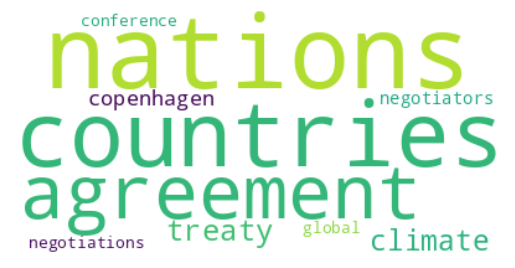

In [21]:
create_wordcloud(topic_model, topic=3)

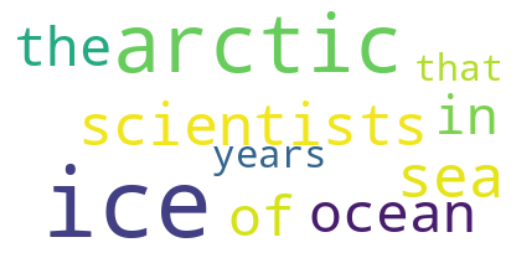

In [22]:
create_wordcloud(topic_model, topic=1)